# Maps of average degree $\langle k \rangle$, average distance $\langle d \rangle$ and number of connected components

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

In [3]:
scheme = 'normal'
alg    = 'greedy'
drop   = 'nodrop'
dsid   = 'sz'
dist   = 'p'

with open('{}\{}_{}_{}_{}_raves_{}.pkl'.format(dsid, dsid, dist, alg, scheme, drop), 'rb') as f:
    raverages = pickle.load(f)
#end
f.close()
with open('{}\{}_{}_{}_{}_faves_{}.pkl'.format(dsid, dsid, dist, alg, scheme, drop), 'rb') as f:
    faverages = pickle.load(f)
#end
f.close()

In [4]:
ravesk = raverages['k']
ravesd = raverages['d']
ravesc = raverages['ccs']

favesk = faverages['k']
favesd = faverages['d']
favesc = faverages['ccs']

c = np.array(ravesk.columns)
e = np.array(ravesk.index)

c, e = np.meshgrid(c, e)
rk = ravesk.values
rd = ravesd.values
rc = ravesc.values
fk = favesk.values
fd = favesd.values
fc = favesc.values

rk = np.array(rk, dtype = np.float64)
rd = np.array(rd, dtype = np.float64)
rc = np.array(rc, dtype = np.float64)
fk = np.array(fk, dtype = np.float64)
fd = np.array(fd, dtype = np.float64)
fc = np.array(fc, dtype = np.float64)

In [8]:
e

array([[  0,   0,   0,   0,   0,   0,   0],
       [  5,   5,   5,   5,   5,   5,   5],
       [ 10,  10,  10,  10,  10,  10,  10],
       [ 15,  15,  15,  15,  15,  15,  15],
       [ 20,  20,  20,  20,  20,  20,  20],
       [100, 100, 100, 100, 100, 100, 100],
       [105, 105, 105, 105, 105, 105, 105],
       [110, 110, 110, 110, 110, 110, 110],
       [115, 115, 115, 115, 115, 115, 115],
       [120, 120, 120, 120, 120, 120, 120]], dtype=int64)

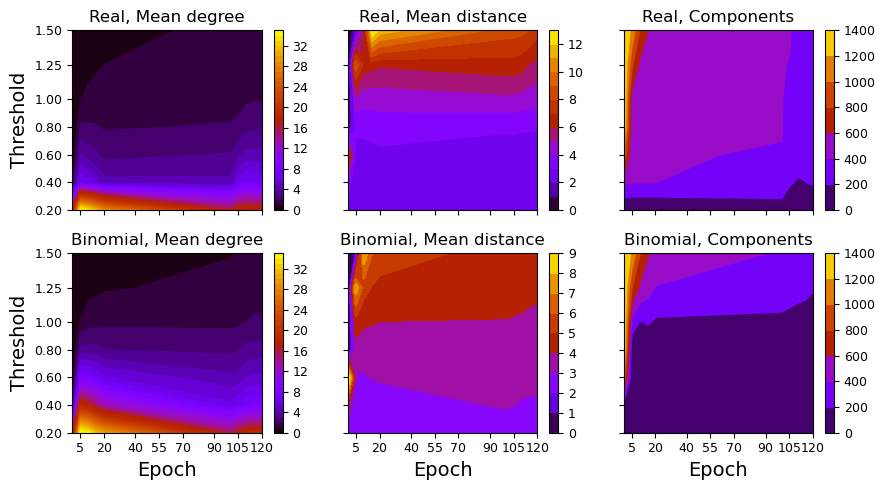

In [11]:

fig, ax = plt.subplots(2,3, figsize = (9,5), dpi = 100, sharex = True, sharey = True)
cplot = np.zeros(ax.shape)
lw = 1
alpha = 1
fstitle = 12
fslabel = 8
cmapkd = 'gnuplot' #Reds, #Oranges
cmapccs = 'gnuplot'

clev = np.arange(rk.min(), rk.max(), 1)
cplot = ax[0,0].contourf(e, c, rk, clev, alpha = alpha, cmap = cmapkd)
for cf in cplot.collections:
    cf.set_edgecolor("face")
#end
ax[0,0].set_title('Real, Mean degree', fontsize = fstitle)
ax[0,0].set_ylabel('Threshold', fontsize = 14)
if alg == 'iterative':    ax[0,0].set_xticks([5,10,15,20,25,30,35,40,45])
if alg == 'greedy':       ax[0,0].set_xticks([5,20,40, 55,70,90, 105,120,140])
ax[0,0].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.25, 1.5])
cbar = fig.colorbar(cplot, ax = ax[0,0])
tkls = cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels(tkls, fontsize = 9)

clev = np.arange(rd.min(), rd.max(), 1)
cplot = ax[0,1].contourf(e, c, rd, clev, alpha = alpha, cmap = cmapkd)
for cf in cplot.collections:
    cf.set_edgecolor("face")
#end
ax[0,1].set_title('Real, Mean distance', fontsize = fstitle)
cbar = fig.colorbar(cplot, ax = ax[0,1])
tkls = cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels(tkls, fontsize = 9)

clev = np.arange(rc.min(), rc.max(), 1)
cplot = ax[0,2].contourf(e, c, rc, alpha = alpha, cmap = cmapccs)
for cf in cplot.collections:
    cf.set_edgecolor("face")
#end
ax[0,2].set_title('Real, Components', fontsize = fstitle)
cbar = fig.colorbar(cplot, ax = ax[0,2])
tkls = cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels(tkls, fontsize = 9)

clev = np.arange(fk.min(), fk.max(), 1)
cplot = ax[1,0].contourf(e, c, fk, clev, alpha = alpha, cmap = cmapkd)
for cf in cplot.collections:
    cf.set_edgecolor("face")
#end
ax[1,0].set_title('Binomial, Mean degree', fontsize = fstitle)
ax[1,0].set_ylabel('Threshold', fontsize = 14) 
ax[1,0].set_xlabel('Epoch', fontsize = 14)
if alg == 'iterative':    ax[1,0].set_xticks([5,10,15,20,25,30,35,40,45])
if alg == 'greedy':       ax[1,0].set_xticks([5,20,40, 55,70,90, 105,120,140])
cbar = fig.colorbar(cplot, ax = ax[1,0])
tkls = cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels(tkls, fontsize = 9)

clev = np.arange(fd.min(), fd.max(), 1)
cplot = ax[1,1].contourf(e, c, fd, clev, alpha = alpha, cmap = cmapkd)
for cf in cplot.collections:
    cf.set_edgecolor("face")
#end
ax[1,1].set_title('Binomial, Mean distance', fontsize = fstitle)
ax[1,1].set_xlabel('Epoch', fontsize = 14)
cbar = fig.colorbar(cplot, ax = ax[1,1])
tkls = cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels(tkls, fontsize = 9)

clev = np.arange(fc.min(), fc.max(), 1)
cplot = ax[1,2].contourf(e, c, fc, alpha = alpha, cmap = cmapccs)
for cf in cplot.collections:
    cf.set_edgecolor("face")
#end
ax[1,2].set_title('Binomial, Components', fontsize = fstitle)
ax[1,2].set_xlabel('Epoch', fontsize = 14)
cbar = fig.colorbar(cplot, ax = ax[1,2])
tkls = cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels(tkls, fontsize = 9)

for j in range(3):
    for tk in ax[1,j].xaxis.get_major_ticks():
        tk.label.set_fontsize(9)
    #end
#end
for i in range(2):
    for tk in ax[i,0].yaxis.get_major_ticks():
        tk.label.set_fontsize(9)
    #end
#end

# fig.subplots_adjust(hspace = 0.3)
fig.tight_layout()
# fig.savefig(os.getcwd() + r'\..\..\images\{}\networks\early\{}_{}_averages_kd_{}.png'.format(scheme, dist, alg, drop), 
#             format = 'png', dpi = 300, bbox_inches = 'tight')
fig.savefig(os.getcwd() + r'\{}_{}_{}_{}_averages_kd_{}.pdf'.format(dsid, scheme, dist, alg, drop), 
            format = 'pdf', dpi = 300, bbox_inches = 'tight')
plt.show(fig)